##### 

# Analysis of Intense Precipitation Events

This notebook analyzes and plots precipitation data while aiding in investigating a scientific question regarding hydrological data. 


@author = Kushum Basnet for ESCI 7/896.02  
@date = 2023-03-23   
@license = MIT -- https://opensource.org/licenses/MIT

### Project Background

Climate change is a phenomenon that is affecting many places around the world, and causing catastrophic events that are having severe impacts on people's lives. Rising sea levels, shrinking mountain glaciers, and extreme weather events such as floods, droughts,and wildfires, are just a few of the ways in which climate change is affecting the planet.The effects of climate change are particularly significant for water managers, scientists, and engineers, who must prepare for future extreme precipitation events. By analyzing and understanding the patterns of climate change, they can better prepare for and mitigate the impacts of extreme weather events on infrastructure and water resources. Furthermore, the data collected from studying the effects of climate change will help to predict and understand how it will affect more places around the globe. This information is critical for policymakers, as it enables them to develop effective strategies to combat the negative effects of climate change. 
The issue of climate change is import to our planet's future. By studying and understanding its effects, we can prepare for and mitigate the impacts of extreme weather events.This notebook aims to help individuals better understand the effects of climate change.

### Research Question

The specific research question that will be investigated using this notebook is: have intense precipitation events, defined as more than 2 inches of rain in one day, been getting more common in recent years as an effect of climate change? To answer this question, the notebook will analyze climate data from a specific region and explore trends in precipitation over time.

To investigate this question, the notebook will make use of several different plots and calculations. First, it will generate a plot showing the maximum precipitation during each year over a long period of record. This plot will help to identify any trends in extreme precipitation events over time, and to compare recent years with earlier periods in history.The notebook will also generate a frequency plot of precipitation, showing how often different levels of precipitation occur over the period of record. This plot will help to identify whether intense precipitation events are becoming more common, and whether there are any specific periods of time when they occur more frequently.Finally, the notebook will calculate the annual average precipitation over the period of record and plot it against time. This plot will help to identify any long-term trends in precipitation and to determine whether there has been an overall increase in precipitation in recent years.

By investigating these different aspects of precipitation data, this notebook will help to shed light on the question of whether intense precipitation events are becoming more common due to climate change. This information can be used by policymakers, water managers, and emergency responders to better prepare for and mitigate the impacts of extreme weather events on communities.
The use of data analysis tools like this notebook is crucial in helping us understand the impacts of climate change and develop effective strategies to mitigate its effects

### Site Description

The site for this project will be a precipitation gauge in Boston,MA located in Boston Logan International.The elevation for this site is about 3.2 meters.This site is the main focus because of the high amount of precipitation events occuring in the northeast.Massachusetts has a humid continental climate which is defined as having humid summers,cold and snowy winters, and abundant precipitation.The site location provides an opportunity to sudy the effects of precipitation on local ecosystems and the enviornment. 

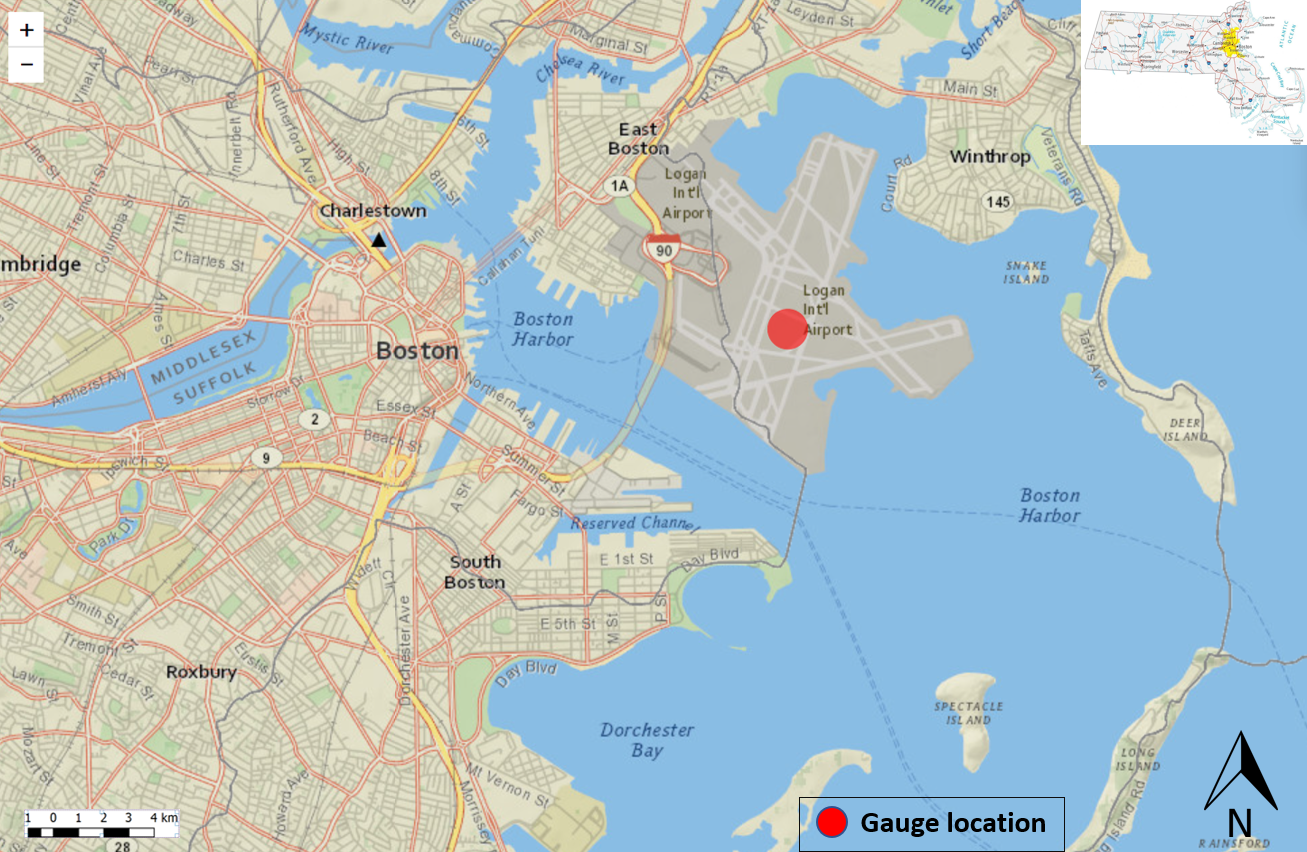



### Data Description

For this project, precipitation data from various scientific sources, including NOAA.Specifically, the Station ID for this site is GHCND:USW00014739. The data set covers a period of record spanning from 1936 to 2023,which is about 87 years of historical data. The analysis will focus on a study period beginning on January 1, 1936, and ending on January 1, 2023.

This data set provides a valuable resource for studying precipitation patterns and trends over time. By analyzing this data, we can gain insights into how precipitation patterns have changed over the past century. Additionally, this data set can help us better understand the relationship between precipitation and climate change. Overall, this data set represents a valuable asset in the study of intense precipitation and its impact on our planet.


In [1]:
# Import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

### Part 1 

In [2]:
# Specify Patameters

# Name of input file 
infile_name='Primary_Station.csv'

# Text for figure title for stations 
fig_title="Boston, MA"

# Study period start date
start='1936-10-01'

#Study period end date
end= '2022-09-30'

#Study Duration(years)
duration=87

In [3]:
# Load primary station precipitation data

#Load Precipitation file into a dataframe 
data = pd.read_csv(infile_name, 
                  parse_dates=['DATE'], index_col=['DATE'])
#Splice data 
data=data[start:end] #Trim data to overlapping period of record


# Replace 9999 and T Values with NaN
data.replace([9999,'T',np.nan],0, inplace=True) #Replaces NaN values with 0

# Adding MDPR to precipitation 
if 'MDPR' in data.columns.tolist():#To consider stations not reporting daily
    data['PRCP']= data['PRCP']+ data['MDPR']
    data.drop(columns={'MDPR'}, inplace=True)
    
# Rename Column
data.rename(columns={"PRCP":"precip"},inplace=True)

# Delete unnecessary columns 
data.drop(columns = {"STATION","NAME","SNOW","SNWD",},inplace = True)


In [4]:
# Convert Precipitation unit from inches to millimeters for primary station 

data['precip'] = data['precip'] * 25.4

Text(0.5, 1.0, 'Boston, MA')

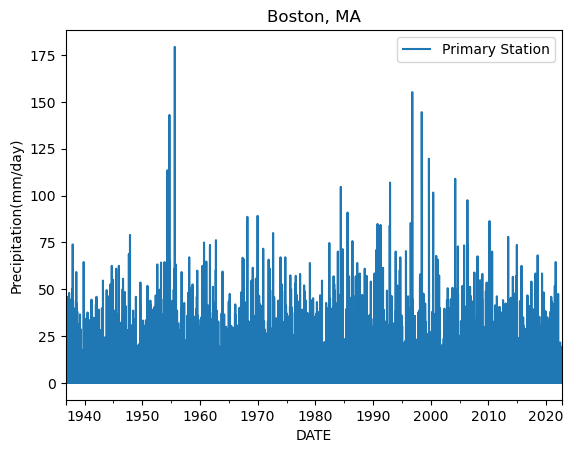

In [5]:
# Plot time series plot

# Create plot to display precipitation station data
fig1, ax = plt.subplots()

# Plot Primary station precipitation data
data.plot( y='precip',ax=ax,label="Primary Station")#x = dataframe index (DATE)

# Add y-axis label    
ax.set_ylabel('Precipitation(mm/day)')   # y = mm/day

# Add plot title
ax.set_title(fig_title)

### Part 2 

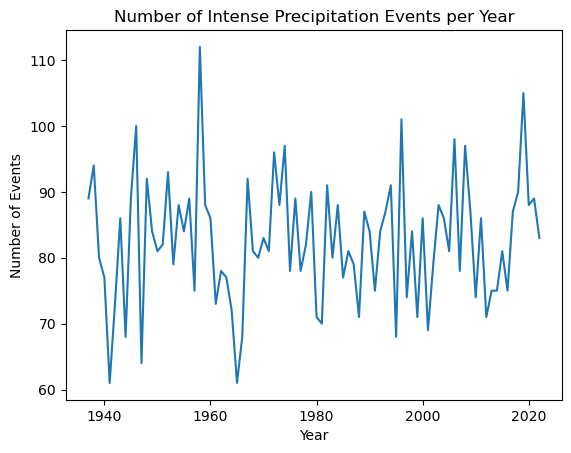

In [6]:
# Add columns to data frame
data['month']=data.index.month # Adding month column
data['wateryear']=data.index.year #Adding wateryear column
data['dayofyear']=data.index.dayofyear #Adding day of year column

#Converting year to water year
data.loc[data['month']>9,'wateryear']=data.loc[data['month']>9,'wateryear']+1

# Find data that include days with more than 2 inches of precipitation
intense_precip = data.loc[data["precip"] > 2]


# Group the data by year and count the number of intense precipitation events for each year
yearly = intense_precip.groupby(intense_precip['wateryear']).size()

# Create a line graph to show the trend of intense precipitation events over time
fig2, ax=plt.subplots()
plt.plot(yearly.index, yearly.values)
plt.title("Number of Intense Precipitation Events per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.show()

Slope: -0.002
Intercept: 12.010
Correlation coefficient: -0.051
P-value: 0.639
Standard error of the slope: 0.005


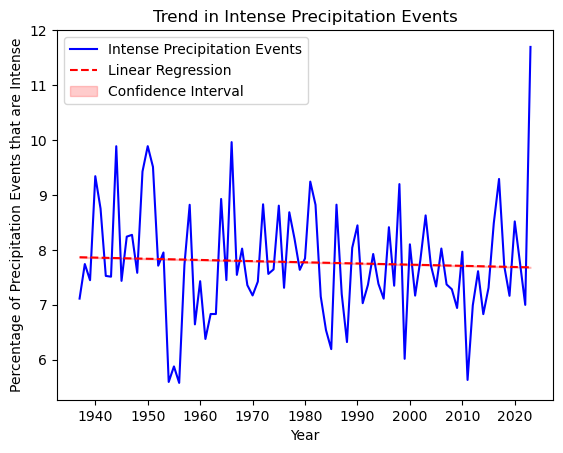

In [7]:
# Group precipitation data by year and calculate total precipitation for each year
precip_yearly_total = data['precip'].resample('Y').sum()


# Group intense precipitation events by year and count the number of events for each year
intense_precip_count = intense_precip['precip'].resample('Y').count()

# Calculate the percentage of intense precipitation events per year
intense_precip_percent = intense_precip_count / precip_yearly_total * 100

# Perform linear regression analysis on percentage of intense precipitation events
slope, intercept, r_value, p_value, std_err = stats.linregress(intense_precip_percent.index.year, intense_precip_percent)

# Add trend line and confidence intervals to the plot
trendline = slope * intense_precip_percent.index.year + intercept
ci_low = trendline - 1.96 * std_err
ci_high = trendline + 1.96 * std_err

# Plot percentage of intense precipitation events over time
fig, ax = plt.subplots()
ax.plot(intense_precip_percent.index, intense_precip_percent, 'b', label='Intense Precipitation Events')
ax.plot(intense_precip_percent.index, trendline, 'r--', label='Linear Regression')
ax.fill_between(intense_precip_percent.index, ci_low, ci_high, color='r', alpha=0.2, label='Confidence Interval')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Precipitation Events that are Intense')
ax.set_title('Trend in Intense Precipitation Events')
ax.legend()

# Print regression results
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"Correlation coefficient: {r_value:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard error of the slope: {std_err:.3f}")

### Part 3 

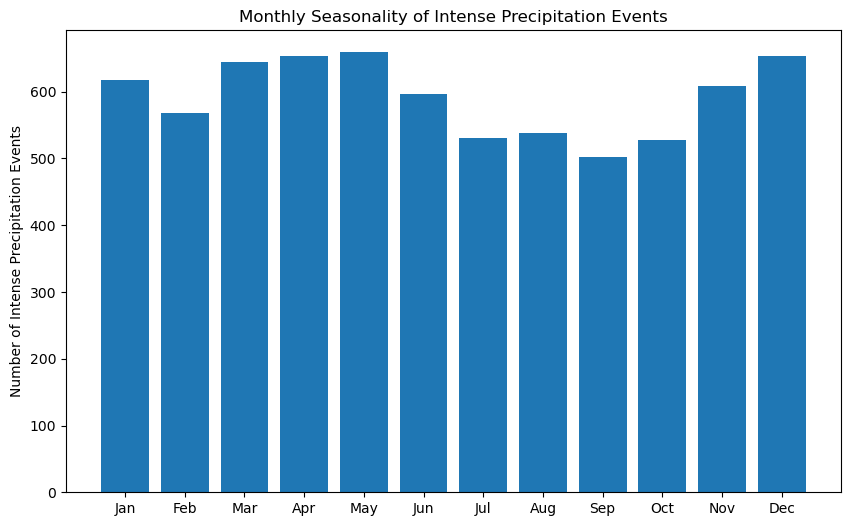

In [8]:
monthly_counts = intense_precip.groupby(intense_precip.index.month).size()

# Plot the frequency plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_counts.index, monthly_counts.values)
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Number of Intense Precipitation Events')
ax.set_title('Monthly Seasonality of Intense Precipitation Events')
plt.show()

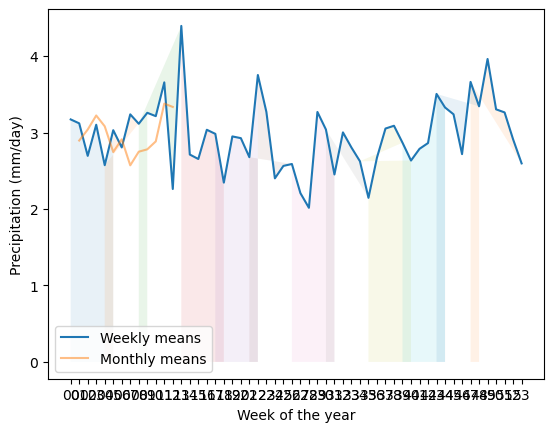

In [9]:
# Create a new column with the week number
data['week'] = data.index.strftime('%U')

# Compute the mean precipitation for each week of the year
weekly_means = data.groupby('week')['precip'].mean()

# Create a new column with the month number
data['month'] = data.index.month

# Compute the mean precipitation for each month of the year
monthly_means = data.groupby('month')['precip'].mean()

# Plot the weekly means with the monthly means as a background
fig, ax = plt.subplots()
ax.plot(weekly_means.index, weekly_means.values, label='Weekly means')
ax.plot(monthly_means.index, monthly_means.values, label='Monthly means', alpha=0.5)

# Highlight the seasonality
for month in range(1, 13):
    week_numbers = data.loc[data['month'] == month, 'week'].unique()
    ax.fill_between(week_numbers, 0, weekly_means.loc[week_numbers], alpha=0.1)

# Set the axis labels and legend
ax.set_xlabel('Week of the year')
ax.set_ylabel('Precipitation (mm/day)')
ax.legend()
plt.show()

Text(0, 0.5, 'Precipitation (mm/day)')

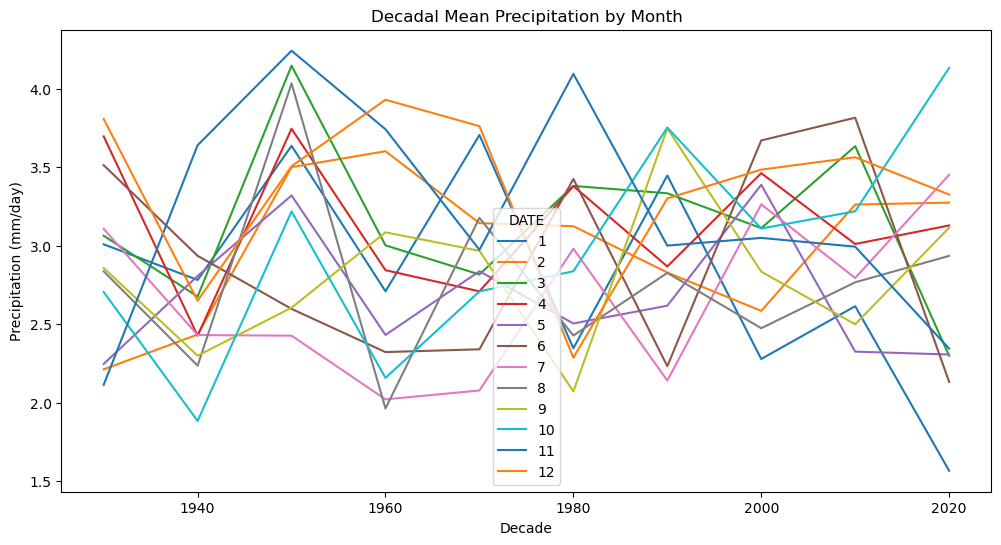

In [10]:
# Create a new column to represent the decade of each data point
data['decade'] = (data.index.year // 10) * 10

# Calculate the mean precipitation for each decade and each month
decadal_monthly_means = data.groupby(['decade', data.index.month])['precip'].mean()

# Reshape the data into a pivot table for plotting
decadal_monthly_means = decadal_monthly_means.reset_index()
decadal_monthly_means_pivot = decadal_monthly_means.pivot(index='decade', columns='DATE', values='precip')

# Create a line plot with separate lines for each month
fig, ax = plt.subplots(figsize=(12,6))
decadal_monthly_means_pivot.plot(ax=ax)

# Add title and axis labels
ax.set_title('Decadal Mean Precipitation by Month')
ax.set_xlabel('Decade')
ax.set_ylabel('Precipitation (mm/day)')

### Conclusion

In conclusion, this notebook analyzes climate data from a precipitation gauge located in Boston, Massachusetts, to explore trends in precipitation over time and answer the research question of whether intense precipitation events have become more common due to climate change. The notebook uses several different plots and calculations to investigate the data, including a plot showing the maximum precipitation during each year, a frequency plot of precipitation, and a plot of the annual average precipitation over time. By analyzing these different aspects of the data, the notebook sheds light on the question of whether intense precipitation events are becoming more common due to climate change, providing valuable information for policymakers, water managers, and emergency responders to better prepare for and mitigate the impacts of extreme weather events on communities. The data set used in this project covers a period of record spanning from 1936 to 2023, providing a valuable resource for studying precipitation patterns and trends over time and understanding the relationship between precipitation and climate change. Overall, this notebook demonstrates the use of data analysis tools in helping us understand the impacts of climate change and develop effective strategies to mitigate its effect